<h1> Imports </h1>

In [1]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from tensorflow.keras import layers
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from keras import backend as K
from google.colab import drive
drive.mount('/content/drive')
from tensorflow import keras
from seaborn import heatmap
from matplotlib import cm
import tensorflow as tf
import pandas as pd
import numpy as np
import itertools
import random
import torch
import cv2
import os

Mounted at /content/drive


<h1> Read Train and Test sets </h1>

In [ ]:
# Rescale = ImageDataGenerator(rescale=1./255,
#                             rotation_range=40,horizontal_flip=True,zoom_range=0.2,height_shift_range=0.2,width_shift_range=0.2,fill_mode='nearest')
# train_ds =Rescale.flow_from_directory('drive/MyDrive/Splited_Data_Sample/train',
#                                           target_size=(150,150),
#                                           batch_size=25,
#                                           class_mode='categorical',
#                                           shuffle=True)


# test_ds =Rescale.flow_from_directory('drive/MyDrive/Splited_Data_Sample/train',
#                                           target_size=(150,150),
#                                           batch_size=25,
#                                           class_mode='categorical', shuffle=True)

# val_ds =Rescale.flow_from_directory('drive/MyDrive/Splited_Data_Sample/val',
#                                           target_size=(150,150),
#                                           batch_size=25,
#                                           class_mode='categorical', shuffle=True)

In [2]:
def plot_perfomance(history_num):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(history_num.history['loss'],'r')
    plt.plot(history_num.history['val_loss'],'b')
    plt.title('Loss',fontsize=14)
    plt.xlabel('Epochs',fontsize=14)
    plt.legend(('loss','val_loss'))
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history_num.history['accuracy'],'r')
    plt.plot(history_num.history['val_accuracy'],'b')
    plt.ylim([0, 1])
    plt.legend(('accuracy','val_accuracy'))
    plt.title('Accuracy',fontsize=12)
    plt.xlabel('Epochs',fontsize=12)
    plt.grid()

In [4]:

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'drive/MyDrive/Splited_Data_Sample/train'
validation_data_dir = 'drive/MyDrive/Splited_Data_Sample/val'
test_data_dir = 'drive/MyDrive/Splited_Data_Sample/test'

batch_size = 20

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = val_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 4895 images belonging to 14 classes.
Found 1345 images belonging to 14 classes.
Found 688 images belonging to 14 classes.


In [18]:
vgg_model = tf.keras.applications.VGG19(
           include_top=False, input_shape=((150, 150, 3)))

model = Sequential(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(180, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(14, activation='softmax'))
# model.layers[0].trainable = False # Freeze the pretrained layer
model.summary()

loss_kind = 'categorical_crossentropy'
opt = keras.optimizers.Adam(learning_rate=1e-06, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss=loss_kind,
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 180)               46260     
                                                                 
 dropout_2 (Dropout)         (None, 180)               0         
                                                                 
 dense_4 (Dense)             (None, 14)               

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=128,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=60)

Epoch 1/80
128/128 [==============================] - 36s 272ms/step - loss: 2.8160 - accuracy: 0.0806 - val_loss: 2.6114 - val_accuracy: 0.1033
Epoch 2/80
128/128 [==============================] - 34s 264ms/step - loss: 2.5991 - accuracy: 0.1184 - val_loss: 2.4254 - val_accuracy: 0.1875
Epoch 3/80
128/128 [==============================] - 34s 264ms/step - loss: 2.4443 - accuracy: 0.1632 - val_loss: 2.2882 - val_accuracy: 0.2617
Epoch 4/80
128/128 [==============================] - 37s 289ms/step - loss: 2.3536 - accuracy: 0.2098 - val_loss: 2.1690 - val_accuracy: 0.3150
Epoch 5/80
128/128 [==============================] - 34s 268ms/step - loss: 2.2296 - accuracy: 0.2560 - val_loss: 2.0126 - val_accuracy: 0.3717
Epoch 6/80
128/128 [==============================] - 34s 266ms/step - loss: 2.1097 - accuracy: 0.3186 - val_loss: 1.8472 - val_accuracy: 0.4317
Epoch 7/80
128/128 [==============================] - 34s 264ms/step - loss: 1.9523 - accuracy: 0.3659 - val_loss: 1.6689 - val_ac

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=1e-06, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# opt = tf.optimizers.Adam(learning_rate=0.005, beta_1=0.99, epsilon=1e-1)

# loss_kind=tf.keras.losses.SparseCategoricalCrossentropy()
# history3 = compile_and_train_the_model(model3, 70, opt, loss_kind, 1)
# history3.history['val_accuracy'][-1]

In [ ]:
# AFTER 19 EPOCHS THE VALֹֹ_ACCURACY reached 66 %

In [20]:
model.save_weights('weights.h5')

In [21]:
model.save_weights("drive/MyDrive/Splited_Data_Sample/model_weights.h5")

In [22]:
torch.save(model.save, 'drive/MyDrive/Splited_Data_Sample/get_weights.pth')

INFO:tensorflow:Assets written to: ram://39b12bd8-f9c4-4ee8-8902-34e9216269a5/assets


In [23]:
torch.save(model.save, 'drive/MyDrive/Splited_Data_Sample/model_sab.pth')

INFO:tensorflow:Assets written to: ram://27685b52-206f-4918-9e98-413e72b45851/assets


In [ ]:
# model.save_history(???)

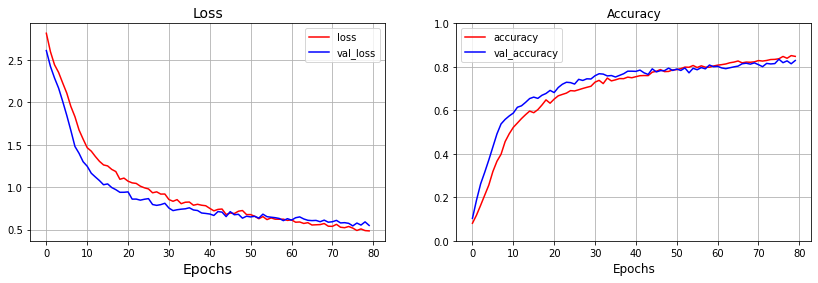

In [24]:
plot_perfomance(history)

In [25]:
history.history['val_accuracy'][-1]

0.8291666507720947

In [29]:

true_label = np.asarray(test_generator.classes) #######################################

y_pred = np.argmax(model.predict((test_generator)),axis=1) # Predict the TEST set

M = confusion_matrix(true_label,y_pred) # Creating the confusion matrix

In [30]:
M

array([[10, 19,  4, 27,  5,  1,  3,  0,  9,  0,  1,  5,  5,  8],
       [11, 15,  3, 27,  2,  3, 11,  0,  6,  0,  0,  5,  8, 10],
       [ 4,  3,  1,  5,  0,  0,  2,  0,  1,  0,  0,  2,  2,  3],
       [28, 17,  2, 30,  6,  2, 12,  0, 15,  0,  3,  7, 10, 12],
       [ 3,  4,  0,  7,  1,  0,  3,  0,  3,  0,  0,  0,  0,  3],
       [ 3,  3,  0,  2,  0,  1,  2,  0,  3,  0,  1,  0,  0,  4],
       [ 8,  9,  3, 11,  2,  1,  5,  0,  6,  0,  1,  1,  6,  5],
       [ 2,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  1,  0,  0],
       [ 9,  8,  3, 15,  1,  2,  4,  0,  7,  0,  0,  2, 10,  6],
       [ 0,  0,  1,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 5,  2,  0,  6,  1,  1,  2,  0,  2,  0,  0,  2,  0,  3],
       [ 4,  9,  2, 15,  3,  2,  4,  0,  1,  0,  1,  3,  3,  6],
       [ 3, 10,  1,  9,  5,  1,  3,  0,  6,  1,  0,  7,  4, 10]])

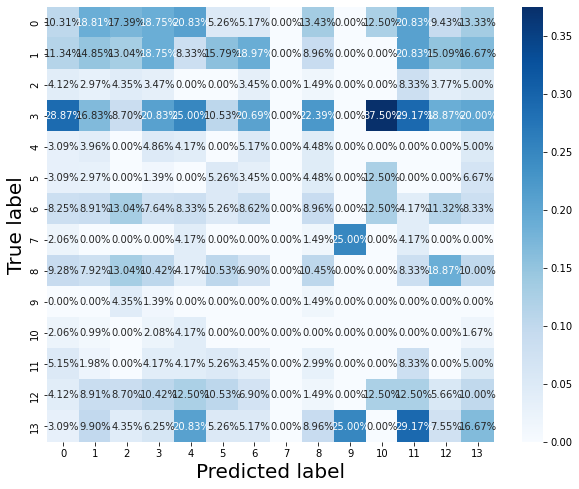

In [31]:
NM = M / M.sum(axis=1) # Normalized Matrix
np.set_printoptions(formatter={'float':'{:0.2f}'.format})
plt.figure(figsize=(10,8))
heatmap(NM,cmap='Blues',annot=True, fmt='.2%')
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.show()

In [32]:
label_map = list(validation_generator.class_indices.keys())

In [ ]:
features_extractor = keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
features_2D = TSNE(n_components=2).fit_transform(features_extractor.predict(test_generator))
plt.figure(figsize=(14,12))
for i in range(12):
    X_label = features_2D[np.where(true_label==i)]
    plt.scatter(X_label[:, 0], X_label[:, 1], label=label_map[i])
plt.legend()
plt.show()